<a href="https://colab.research.google.com/github/vanditaagarwal/Prediction_and_Classification_of_Happiness_Score_using_ML/blob/main/Final_Project_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
 data=pd.read_csv('/content/Copy_Happiness_score - Form Responses 1.csv')
data.head()

,Timestamp,NAME,I am voluntarily giving this information with my consent .,Please give ratings to yourself in following fields : [ Anxiety and Depression Level],Please give ratings to yourself in following fields : [Sleeping Hours (treat this entity as hour)],Please give ratings to yourself in following fields : [Health ],Please give ratings to yourself in following fields : [Involvement in Sports Activity],Please give ratings to yourself in following fields : [Engagement in Extra curricular activities],Please give ratings to yourself in following fields : [Practicing Exercises/ Yoga],Please give ratings to yourself in following fields : [Effect of quizzes and assignments],...,"Please give ratings to yourself in following fields : [Helping, Caring and Sharing]",Please give ratings to yourself in following fields : [Food Satisfaction],Please give ratings to yourself in following fields : [Short temperedness],Course name,Year ??,Department,Gender,In a Relationship ??,Are you getting Stipend/fellowship/scholarship or any financial support by government,What is your happiness score according to you?(give answer in a range of (0-10))
0,10/1/2022 10:48:37,NaN,Yes,0,10,10,7,0,7,0,...,5,1,0,Phd,2nd Year,Mathematics,MALE,YES,YES,9.0
1,10/1/2022 10:50:37,Mrityunjoy Saha,Yes,1,6,7,1,2,1,2,...,8,1,0,Phd,1st Year,Mathematics,MALE,COMPLICATED,YES,9.0
2,10/1/2022 10:52:36,NaN,Yes,3,6,6,3,4,4,9,...,5,5,5,B.Tech,3rd Year,"Metallurgical & Materials Engineering, and",FEMALE,COMPLICATED,NO,4.0
3,10/1/2022 10:53:14,NaN,Yes,4,7,8,7,3,8,4,...,8,3,3,Phd,1st Year,Mathematics,MALE,COMPLICATED,YES,5.0
4,10/1/2022 11:00:09,Anurupa Karmakar,Yes,4,6,5,2,2,2,2,...,9,0,5,M.Tech,2nd Year,Bioscience and Bioengineering,FEMALE,YES,YES,6.0


In [ ]:
df= data.drop(['Timestamp','NAME','I am voluntarily giving this information with my consent .'], axis=1)
df.head()

,Please give ratings to yourself in following fields : [ Anxiety and Depression Level],Please give ratings to yourself in following fields : [Sleeping Hours (treat this entity as hour)],Please give ratings to yourself in following fields : [Health ],Please give ratings to yourself in following fields : [Involvement in Sports Activity],Please give ratings to yourself in following fields : [Engagement in Extra curricular activities],Please give ratings to yourself in following fields : [Practicing Exercises/ Yoga],Please give ratings to yourself in following fields : [Effect of quizzes and assignments],Please give ratings to yourself in following fields : [Screen time in hour (treat this entity as hour)],Please give ratings to yourself in following fields : [Effect of Family issues],Please give ratings to yourself in following fields : [Duration of time spent with friends],...,"Please give ratings to yourself in following fields : [Helping, Caring and Sharing]",Please give ratings to yourself in following fields : [Food Satisfaction],Please give ratings to yourself in following fields : [Short temperedness],Course name,Year ??,Department,Gender,In a Relationship ??,Are you getting Stipend/fellowship/scholarship or any financial support by government,What is your happiness score according to you?(give answer in a range of (0-10))
0,0,10,10,7,0,7,0,10,4,6,...,5,1,0,Phd,2nd Year,Mathematics,MALE,YES,YES,9.0
1,1,6,7,1,2,1,2,4,6,5,...,8,1,0,Phd,1st Year,Mathematics,MALE,COMPLICATED,YES,9.0
2,3,6,6,3,4,4,9,5,5,5,...,5,5,5,B.Tech,3rd Year,"Metallurgical & Materials Engineering, and",FEMALE,COMPLICATED,NO,4.0
3,4,7,8,7,3,8,4,3,0,3,...,8,3,3,Phd,1st Year,Mathematics,MALE,COMPLICATED,YES,5.0
4,4,6,5,2,2,2,2,5,0,5,...,9,0,5,M.Tech,2nd Year,Bioscience and Bioengineering,FEMALE,YES,YES,6.0


In [ ]:
df.columns =["anxiety_level", "sleeping_hours", "health", "sports", "extra-curricular", "Exercises_Yoga", "Quizzes/assignments", "screen_hours", "effect_familyissues", "friends_time", "study_satisfaction", "performing_meditation", "following_hobby", "caring/sharing", "food_satisfaction", "short_temperedness", "Course_name", "Year", "Department", "Gender", "Relationship_status", "Getting_Stipend", "Happiness_Score"]
df.head()

,anxiety_level,sleeping_hours,health,sports,extra-curricular,Exercises_Yoga,Quizzes/assignments,screen_hours,effect_familyissues,friends_time,...,caring/sharing,food_satisfaction,short_temperedness,Course_name,Year,Department,Gender,Relationship_status,Getting_Stipend,Happiness_Score
0,0,10,10,7,0,7,0,10,4,6,...,5,1,0,Phd,2nd Year,Mathematics,MALE,YES,YES,9.0
1,1,6,7,1,2,1,2,4,6,5,...,8,1,0,Phd,1st Year,Mathematics,MALE,COMPLICATED,YES,9.0
2,3,6,6,3,4,4,9,5,5,5,...,5,5,5,B.Tech,3rd Year,"Metallurgical & Materials Engineering, and",FEMALE,COMPLICATED,NO,4.0
3,4,7,8,7,3,8,4,3,0,3,...,8,3,3,Phd,1st Year,Mathematics,MALE,COMPLICATED,YES,5.0
4,4,6,5,2,2,2,2,5,0,5,...,9,0,5,M.Tech,2nd Year,Bioscience and Bioengineering,FEMALE,YES,YES,6.0


Categorical variables conversion to numerical variables

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#'Year','Department','Gender','Relationship_status','Getting_Stipend'
label1 = le.fit_transform(df['Course_name'])
label1
df.drop("Course_name", axis=1, inplace=True)
df["Course_name"] = label1

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

#'Year','Department','Gender','Relationship_status','Getting_Stipend'
label2 = le.fit_transform(df['Year'])
label2

df.drop("Year", axis=1, inplace=True)


df["Year"] = label2

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

#'Year','Department','Gender','Relationship_status','Getting_Stipend'
label3 = le.fit_transform(df['Department'])
label3

df.drop("Department", axis=1, inplace=True)
df["Department"] = label3

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#'Year','Department','Gender','Relationship_status','Getting_Stipend'
label4 = le.fit_transform(df['Gender'])
label4

df.drop("Gender", axis=1, inplace=True)
df["Gender"] = label4

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#'Year','Department','Gender','Relationship_status','Getting_Stipend'
label5 = le.fit_transform(df['Relationship_status'])
label5

df.drop("Relationship_status", axis=1, inplace=True)

df["Relationship_status"] = label5

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#'Year','Department','Gender','Relationship_status','Getting_Stipend'
label6 = le.fit_transform(df['Getting_Stipend'])
label6
df.drop("Getting_Stipend", axis=1, inplace=True)
df["Getting_Stipend"] = label6

In [ ]:
df.head()

,anxiety_level,sleeping_hours,health,sports,extra-curricular,Exercises_Yoga,Quizzes/assignments,screen_hours,effect_familyissues,friends_time,...,caring/sharing,food_satisfaction,short_temperedness,Happiness_Score,Course_name,Year,Department,Gender,Relationship_status,Getting_Stipend
0,0,10,10,7,0,7,0,10,4,6,...,5,1,0,9.0,6,1,7,1,3,1
1,1,6,7,1,2,1,2,4,6,5,...,8,1,0,9.0,6,0,7,1,0,1
2,3,6,6,3,4,4,9,5,5,5,...,5,5,5,4.0,0,2,9,0,0,0
3,4,7,8,7,3,8,4,3,0,3,...,8,3,3,5.0,6,0,7,1,0,1
4,4,6,5,2,2,2,2,5,0,5,...,9,0,5,6.0,3,1,0,0,3,1


In [ ]:
X_new= df.drop(['Happiness_Score'],axis=1)

In [ ]:
print(df['Happiness_Score'].values)

[ 9.    9.    4.    5.    6.    6.    7.    9.    1.    9.    8.    9.
  8.5   5.    8.    7.    7.    5.    8.    0.    6.    4.    6.    5.
  9.    8.    7.    5.    9.    6.5   4.    6.    3.    3.    7.    5.
  7.    0.    0.    8.    2.    2.    3.    0.    7.    7.    9.    7.
  6.    5.    4.    4.    7.    5.    0.    9.    8.    8.    8.    0.
  5.    8.    7.    7.    6.    3.    6.    6.    9.    6.    4.    7.
  6.    3.    5.    7.5   5.    4.    2.    2.    6.    5.5   0.    5.
  6.    5.    6.    5.    6.    0.    8.    7.    9.    8.    0.    4.
  7.    6.    3.    5.    8.    4.    3.    9.    4.   10.    5.    5.
  4.    7.    4.    7.    6.    4.    6.75  8.   10.    6.5   6.    7.
  8.8   7.    3.    7.5   9.    7.    7.    7.    6.    7.    6.    8.
  6.    7.    2.    7.    7.    8.    5.    6.    5.    8.5   9.    7.
 10.    5.    5.    4.    7.    9.    1.    2.    7.   10.    6.    3.  ]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   anxiety_level          156 non-null    int64  
 1   sleeping_hours         156 non-null    int64  
 2   health                 156 non-null    int64  
 3   sports                 156 non-null    int64  
 4   extra-curricular       156 non-null    int64  
 5   Exercises_Yoga         156 non-null    int64  
 6   Quizzes/assignments    156 non-null    int64  
 7   screen_hours           156 non-null    int64  
 8   effect_familyissues    156 non-null    int64  
 9   friends_time           156 non-null    int64  
 10  study_satisfaction     156 non-null    int64  
 11  performing_meditation  156 non-null    int64  
 12  following_hobby        156 non-null    int64  
 13  caring/sharing         156 non-null    int64  
 14  food_satisfaction      156 non-null    int64  
 15  short_

In [ ]:
df.describe()

,anxiety_level,sleeping_hours,health,sports,extra-curricular,Exercises_Yoga,Quizzes/assignments,screen_hours,effect_familyissues,friends_time,...,caring/sharing,food_satisfaction,short_temperedness,Happiness_Score,Course_name,Year,Department,Gender,Relationship_status,Getting_Stipend
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,...,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,3.641026,6.250000,5.935897,3.371795,3.416667,3.301282,5.032051,5.788462,3.173077,4.012821,...,6.128205,3.673077,3.564103,5.795192,2.153846,1.237179,4.948718,0.679487,1.391026,0.378205
std,3.168288,2.477316,2.779370,3.211307,2.981574,3.385776,3.285196,2.803246,3.102888,2.637171,...,3.157618,2.889723,3.182978,2.456865,2.393954,0.937479,2.542021,0.494971,0.912803,0.486501
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,5.750000,4.000000,0.000000,1.000000,0.000000,2.000000,3.750000,0.000000,2.000000,...,4.000000,1.000000,1.000000,4.000000,0.000000,1.000000,3.000000,0.000000,1.000000,0.000000
50%,3.000000,7.000000,7.000000,2.000000,3.000000,2.000000,5.000000,6.000000,2.000000,3.000000,...,7.000000,4.000000,3.000000,6.000000,1.000000,1.000000,5.000000,1.000000,1.000000,0.000000
75%,6.000000,8.000000,8.000000,6.000000,5.250000,6.000000,8.000000,8.000000,5.000000,6.000000,...,9.000000,6.000000,6.000000,7.125000,4.000000,2.000000,7.000000,1.000000,2.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,7.000000,3.000000,10.000000,2.000000,3.000000,1.000000


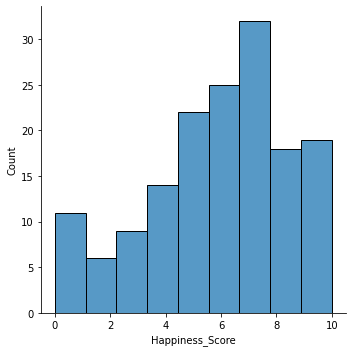

In [ ]:
sns.displot(df['Happiness_Score'])

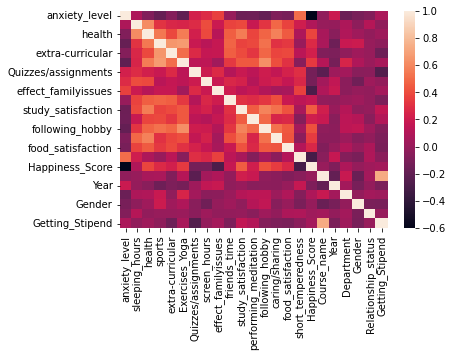

In [ ]:
sns.heatmap(df.corr())

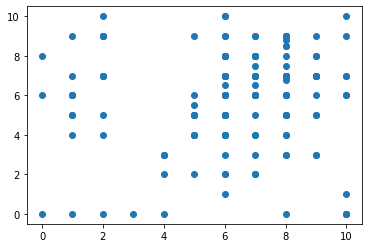

In [ ]:
plt.scatter(x=df['sleeping_hours'],y= df['Happiness_Score'])

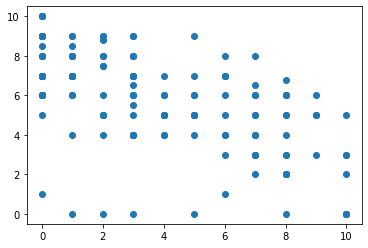

In [ ]:
plt.scatter(x=df['anxiety_level'],y= df['Happiness_Score'])

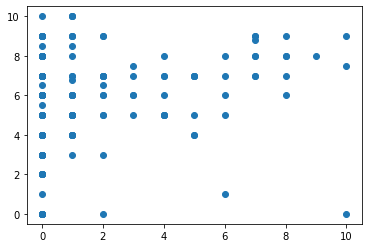

In [ ]:
plt.scatter(x=df['performing_meditation'],y= df['Happiness_Score'])

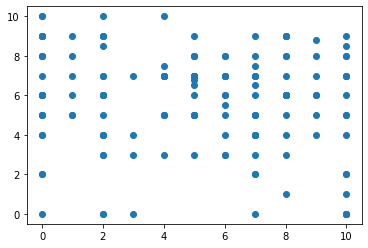

In [ ]:
plt.scatter(x=df['Quizzes/assignments'],y= df['Happiness_Score'])

In [ ]:
cor_matrix = df.corr()
print(cor_matrix)

                       anxiety_level  sleeping_hours    health    sports  \
anxiety_level               1.000000        0.085486 -0.079558 -0.181468   
sleeping_hours              0.085486        1.000000  0.616079  0.313440   
health                     -0.079558        0.616079  1.000000  0.543369   
sports                     -0.181468        0.313440  0.543369  1.000000   
extra-curricular           -0.069435        0.265312  0.392510  0.652141   
Exercises_Yoga             -0.201556        0.252484  0.561506  0.672011   
Quizzes/assignments         0.234794        0.282807  0.229865  0.189664   
screen_hours                0.284865        0.405285  0.392404  0.127045   
effect_familyissues         0.363367        0.197447  0.120990  0.176087   
friends_time                0.002099        0.373779  0.459580  0.479375   
study_satisfaction         -0.154306        0.390183  0.559863  0.369871   
performing_meditation      -0.149243        0.185240  0.374748  0.390859   
following_ho

In [ ]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

                       anxiety_level  sleeping_hours    health    sports  \
anxiety_level                    NaN        0.085486 -0.079558 -0.181468   
sleeping_hours                   NaN             NaN  0.616079  0.313440   
health                           NaN             NaN       NaN  0.543369   
sports                           NaN             NaN       NaN       NaN   
extra-curricular                 NaN             NaN       NaN       NaN   
Exercises_Yoga                   NaN             NaN       NaN       NaN   
Quizzes/assignments              NaN             NaN       NaN       NaN   
screen_hours                     NaN             NaN       NaN       NaN   
effect_familyissues              NaN             NaN       NaN       NaN   
friends_time                     NaN             NaN       NaN       NaN   
study_satisfaction               NaN             NaN       NaN       NaN   
performing_meditation            NaN             NaN       NaN       NaN   
following_ho

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [ ]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.50)]
print(); print(to_drop)


['health', 'sports', 'extra-curricular', 'Exercises_Yoga', 'study_satisfaction', 'following_hobby', 'caring/sharing', 'short_temperedness', 'Getting_Stipend']


In [ ]:
new_df = df.drop(df[to_drop], axis=1)
print(new_df.head())

   anxiety_level  sleeping_hours  Quizzes/assignments  screen_hours  \
0              0              10                    0            10   
1              1               6                    2             4   
2              3               6                    9             5   
3              4               7                    4             3   
4              4               6                    2             5   

   effect_familyissues  friends_time  performing_meditation  \
0                    4             6                      7   
1                    6             5                      2   
2                    5             5                      5   
3                    0             3                      4   
4                    0             5                      3   

   food_satisfaction  Happiness_Score  Course_name  Year  Department  Gender  \
0                  1              9.0            6     1           7       1   
1                  1              

In [ ]:
new_df.columns

Index(['anxiety_level', 'sleeping_hours', 'Quizzes/assignments',
       'screen_hours', 'effect_familyissues', 'friends_time',
       'performing_meditation', 'food_satisfaction', 'Happiness_Score',
       'Course_name', 'Year', 'Department', 'Gender', 'Relationship_status'],
      dtype='object')

In [ ]:
X= new_df[['anxiety_level','sleeping_hours','Quizzes/assignments','screen_hours', 'effect_familyissues', 'friends_time','performing_meditation', 'food_satisfaction','Course_name', 'Year', 'Department', 'Gender', 'Relationship_status']]
Y= new_df['Happiness_Score']

In [ ]:
data_point= [[3,8,7,10,9,10,0,0,5,1,1,1,1],[9,1,7,8,0,5,0,0,1,1,4,1,1],[8,5,7,6,7,2,0,2,1,1,1,0,3],[4,7,2,5,0,6,9,6,6,1,1,1,1]]
x_trial= pd.DataFrame(data_point,columns=['anxiety_level','sleeping_hours','Quizzes/assignments','screen_hours', 'effect_familyissues', 'friends_time','performing_meditation', 'food_satisfaction','Course_name', 'Year', 'Department', 'Gender', 'Relationship_status'])
x_trial

,anxiety_level,sleeping_hours,Quizzes/assignments,screen_hours,effect_familyissues,friends_time,performing_meditation,food_satisfaction,Course_name,Year,Department,Gender,Relationship_status
0,3,8,7,10,9,10,0,0,5,1,1,1,1
1,9,1,7,8,0,5,0,0,1,1,4,1,1
2,8,5,7,6,7,2,0,2,1,1,1,0,3
3,4,7,2,5,0,6,9,6,6,1,1,1,1


**Multiple Linear Regression**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.4, random_state=104)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm= LinearRegression()

In [ ]:
lm.fit(X_train,Y_train)

LinearRegression()

In [ ]:
predictions= lm.predict(X_test)
print(predictions)

[3.55289806 6.81932667 6.3900265  4.368621   6.06844383 6.5774785
 5.12756492 4.25332565 6.94388557 6.24280793 5.02750916 7.82803071
 2.41253432 7.32750896 7.10624431 4.76856144 0.3936772  5.82810467
 8.26965776 6.82355672 6.75138851 8.06014339 6.2847918  4.95058709
 7.44946811 2.9519816  4.31635522 5.22433492 7.38942883 3.45165291
 3.09036312 4.22855636 3.87528543 6.70711955 3.95716585 5.8375996
 6.87551494 3.99076441 5.78434807 2.8850181  6.75462343 4.81968982
 6.69929665 6.83995163 2.91278783 6.02891293 5.51621216 6.84580907
 5.8855136  6.19581925 8.10501129 6.13724555 3.76212974 7.18507683
 6.91786513 4.79742483 7.67893888 8.52298568 5.86519744 6.22354126
 5.96042048 5.5671235  7.40818082]


In [ ]:
predictions_trial= lm.predict(x_trial)
print(predictions_trial)

[4.66984635 3.1922936  2.17685331 7.305178  ]


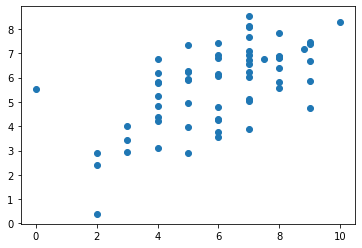

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(Y_test,predictions)

In [ ]:
lm.intercept_

6.838562268529167

In [ ]:
lm.coef_

array([-0.4007952 ,  0.0941459 , -0.00982164, -0.05311649, -0.21879572,
        0.12263917,  0.10784141,  0.06214973, -0.00649384,  0.12208933,
        0.03268856, -0.3241472 , -0.17497273])

In [ ]:
#y_pred= lm.intercept_+ np.sum(lm.coef_*X, axis=1)

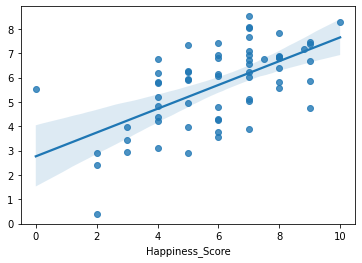

In [ ]:
sns.regplot( x= Y_test, y= predictions)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, predictions)

2.885622262877103

In [ ]:
from sklearn.metrics import r2_score
r2_score(Y_test, predictions)

0.3293761535854979

Linear regression for particular features

In [ ]:
# Anxiety vs Happiness Score

In [ ]:
X1= new_df['anxiety_level'].values
Y1= new_df['Happiness_Score']
Y1.astype(int)
X1=X1.reshape(-1,1)

In [ ]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1,Y1,test_size=0.4, random_state=104)
#X1_train

In [ ]:
X1_train=X1_train.reshape(-1,1)
lm.fit(X1_train,Y1_train)

LinearRegression()

In [ ]:
prediction1= lm.predict(X1_test)

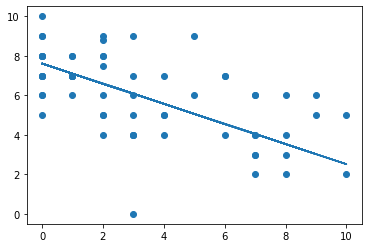

In [ ]:
plt.scatter(X1_test,Y1_test)
plt.plot(X1_test,prediction1)

In [ ]:
lm.intercept_

7.607081485587583

In [ ]:
lm.coef_

array([-0.50903825])

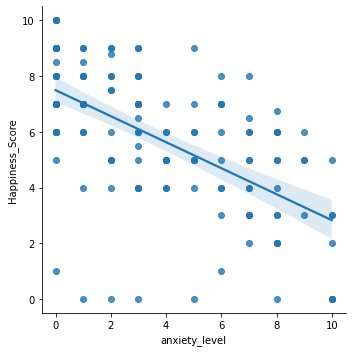

In [ ]:
sns.lmplot( x='anxiety_level',y= 'Happiness_Score' , data= new_df)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y1_test, prediction1)

3.0254707943167505

In [ ]:
 # Meditation vs Happiness score

In [ ]:
X2= new_df['performing_meditation'].values
Y2= new_df['Happiness_Score']
#Y2.astype(int)
X2=X2.reshape(-1,1)

In [ ]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2,Y2,test_size=0.4, random_state=104)

In [ ]:
X2_train=X2_train.reshape(-1,1)
lm.fit(X2_train,Y2_train)

LinearRegression()

In [ ]:
prediction2= lm.predict(X2_test)

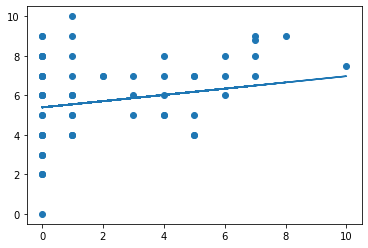

In [ ]:
plt.scatter(X2_test,Y2_test)
plt.plot(X2_test,prediction2)

In [ ]:
lm.intercept_

5.389061574896388

In [ ]:
lm.coef_

array([0.15782268])

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y2_test, prediction2)

3.968017012115607

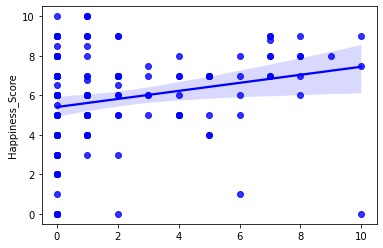

In [ ]:
sns.regplot( x= X2, y= Y2, color='b')

In [ ]:
X3= new_df['sleeping_hours'].values
Y3= new_df['Happiness_Score']
#Y2.astype(int)
X3=X3.reshape(-1,1)

In [ ]:
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3,Y3,test_size=0.4, random_state=104)

In [ ]:
X3_train=X3_train.reshape(-1,1)
lm.fit(X3_train,Y3_train)

LinearRegression()

In [ ]:
prediction3= lm.predict(X3_test)

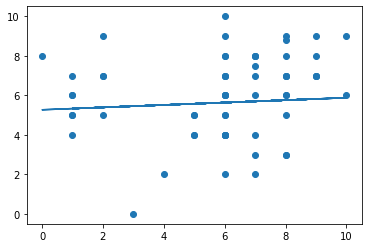

In [ ]:
plt.scatter(X3_test,Y3_test)
plt.plot(X3_test,prediction3)

In [ ]:
lm.intercept_

5.268515575333757

In [ ]:
lm.coef_

array([0.06089081])

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y3_test, prediction3)

4.337214394034948

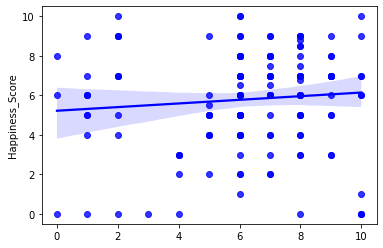

In [ ]:
sns.regplot( x= X3, y= Y3, color='b')

In [ ]:
X4= new_df['Quizzes/assignments'].values
Y4= new_df['Happiness_Score']
#Y2.astype(int)
X4=X4.reshape(-1,1)

In [ ]:
X4_train, X4_test, Y4_train, Y4_test = train_test_split(X4,Y4,test_size=0.4, random_state=104)

In [ ]:
X4_train=X4_train.reshape(-1,1)
lm.fit(X4_train,Y4_train)

LinearRegression()

In [ ]:
prediction4= lm.predict(X4_test)

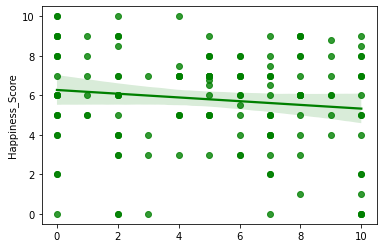

In [ ]:
sns.regplot(x= X4, y= Y4,color='g')

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y4_test, prediction4)            # anxiety level and meditation has less MSE

4.549070423989373



**Principal Component ANalysis for feature reduction**

In [ ]:
X_trials=  pd.concat([X, x_trial])
X_trials.head()

,anxiety_level,sleeping_hours,Quizzes/assignments,screen_hours,effect_familyissues,friends_time,performing_meditation,food_satisfaction,Course_name,Year,Department,Gender,Relationship_status
0,0,10,0,10,4,6,7,1,6,1,7,1,3
1,1,6,2,4,6,5,2,1,6,0,7,1,0
2,3,6,9,5,5,5,5,5,0,2,9,0,0
3,4,7,4,3,0,3,4,3,6,0,7,1,0
4,4,6,2,5,0,5,3,0,3,1,0,0,3


In [ ]:
# PCA for dimensionality reduction

import sklearn.decomposition as skd

pca_finder = skd.PCA(n_components=0.9)

pca_finder.fit(X)
X_pca1 = pca_finder.transform(X)
print("Number of reduced dimensions: "+str(X_pca1.shape[1]))

Number of reduced dimensions: 9


In [ ]:
#import sklearn.decomposition as skd

pca_finder = skd.PCA(n_components=4)

pca_finder.fit(X_trials)
x_trial_pca1 = pca_finder.transform(X_trials)
print("Number of reduced dimensions: "+str(x_trial_pca1.shape[1]))
print(x_trial_pca1)
x_trial_pca1.shape


Number of reduced dimensions: 4
[[ 2.12374396e-02 -5.33654672e+00  8.36904805e+00 -1.02316204e+00]
 [-2.48390385e+00 -1.07319333e+00  5.03461938e+00  3.55848094e+00]
 [ 3.37340803e+00 -2.83280079e+00 -2.61527337e+00  4.01583435e+00]
 [-2.91877755e+00 -1.97122570e+00  1.30199765e+00  1.84073610e+00]
 [-3.68657015e+00  1.65264663e+00  2.66181431e+00 -2.98464431e+00]
 [ 2.71183233e+00  4.56119072e+00 -4.39422021e+00 -5.06143209e+00]
 [-1.39804135e+00 -8.08799836e+00  1.30184211e+00  2.14953213e+00]
 [ 6.09114760e-01 -3.45657124e+00  4.57526810e+00 -1.35986937e+00]
 [ 4.59892506e+00  1.54623572e+00 -5.01858318e+00 -2.06795869e+00]
 [-3.36609581e-01 -3.64884274e+00  4.48369923e-01 -3.87408128e+00]
 [ 3.82394274e-01 -5.05951057e-01 -4.95106304e+00 -1.40283987e+00]
 [-1.43304287e+00 -2.29996283e+00 -2.56526701e+00  4.35939755e+00]
 [-1.58690814e+00 -4.37400375e+00  1.23046416e+00 -3.95544644e-01]
 [-1.64919373e+00  2.81007773e+00 -1.00204469e+00 -1.79585971e+00]
 [ 2.60971475e+00 -5.69762268e

(160, 4)

In [ ]:
t= x_trial_pca1[156:160, : ]
t

array([[ 5.85755139,  2.35128695,  5.15031053, -1.3711226 ],
       [-0.54519753,  6.52842049, -1.49207497, -2.25961108],
       [ 2.62895896,  6.88920332, -0.78125002,  0.82439999],
       [-0.58499637, -4.64425275,  4.44243949, -1.48379435]])

**Multiple Linear Regression**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_pc= X_pca1
Y_pc= df['Happiness_Score']

In [ ]:
X_pc_train, X_pc_test, Y_pc_train, Y_pc_test = train_test_split(X_pc,Y_pc,test_size=0.4, random_state=104)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr= LinearRegression()

In [ ]:
lr.fit(X_pc_train,Y_pc_train)

LinearRegression()

In [ ]:
predictions_pc= lr.predict(X_pc_test)
print(predictions_pc)

[3.79225826 7.1899534  6.47362465 4.48452512 6.3043225  6.59507308
 5.15625273 3.61305207 6.92541945 6.40882713 4.61180692 7.33274541
 2.62533394 7.51967357 7.10529375 4.52131327 1.05023932 5.64243014
 7.67159151 6.82729985 6.61061247 8.02765936 6.45560565 4.88447132
 7.71410991 3.33567692 4.04015898 5.02354968 7.70591425 3.31420912
 2.60892883 4.1963678  4.15787595 6.73876511 3.93653301 5.95214624
 6.64742715 4.130818   5.55583414 2.76977948 6.11797216 4.66168307
 6.67257702 7.21908101 2.98802207 5.94156984 5.59145158 6.9114571
 5.97192765 6.47570235 7.76043486 6.1919745  4.13067368 6.6315321
 7.42508698 4.59923857 7.22068369 8.41059128 5.69255254 5.93465453
 5.8636727  5.59159864 7.30541288]


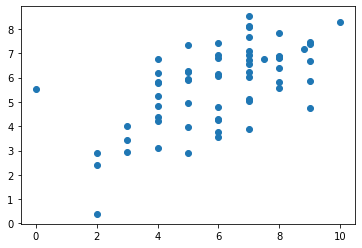

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(Y_test,predictions)

In [ ]:
lr.intercept_

5.664852758105717

In [ ]:
lr.coef_

array([-0.14835507, -0.41622066, -0.06336933, -0.06541886,  0.05956336,
       -0.14427766,  0.01729968, -0.06512063,  0.04057742])

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_pc_test, predictions_pc)

2.950566875914733

**Random FOrest Regression**

In [ ]:

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_pc_train,Y_pc_train)



RandomForestRegressor(random_state=0)

In [ ]:
Y_pred = regressor.predict(X_pc_test)

In [ ]:
X_pc_test.shape

(63, 9)

In [ ]:
Y_pc_test.shape

(63,)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_pc_test, Y_pred)

3.5742039682539697

In [ ]:
from sklearn.metrics import r2_score
r2_score(Y_pc_test, Y_pred)

0.1693485166452161

In [ ]:
#Y_pred_trial = regressor.predict(x_trial)

**Time to see our problem as Classification Problem**

Conversion of values of 'Happiness Score' to integer values to use classification

In [ ]:
df['Happiness_Score'] = df['Happiness_Score'].fillna(0).astype(int)
df['Happiness_Score'].values

array([ 9,  9,  4,  5,  6,  6,  7,  9,  1,  9,  8,  9,  8,  5,  8,  7,  7,
        5,  8,  0,  6,  4,  6,  5,  9,  8,  7,  5,  9,  6,  4,  6,  3,  3,
        7,  5,  7,  0,  0,  8,  2,  2,  3,  0,  7,  7,  9,  7,  6,  5,  4,
        4,  7,  5,  0,  9,  8,  8,  8,  0,  5,  8,  7,  7,  6,  3,  6,  6,
        9,  6,  4,  7,  6,  3,  5,  7,  5,  4,  2,  2,  6,  5,  0,  5,  6,
        5,  6,  5,  6,  0,  8,  7,  9,  8,  0,  4,  7,  6,  3,  5,  8,  4,
        3,  9,  4, 10,  5,  5,  4,  7,  4,  7,  6,  4,  6,  8, 10,  6,  6,
        7,  8,  7,  3,  7,  9,  7,  7,  7,  6,  7,  6,  8,  6,  7,  2,  7,
        7,  8,  5,  6,  5,  8,  9,  7, 10,  5,  5,  4,  7,  9,  1,  2,  7,
       10,  6,  3])


**Neural Networks for Classification**

In [ ]:
X_pc1= X_pca1
Y_pc1= df['Happiness_Score']

In [ ]:
X_pc_train1, X_pc_test1, Y_pc_train1, Y_pc_test1 = train_test_split(X_pc1,Y_pc1,test_size=0.4, random_state=104)

In [ ]:
from sklearn.neural_network import MLPClassifier
MLP= MLPClassifier(solver='sgd',hidden_layer_sizes=(20,20,20,30),max_iter=5000,alpha=1e-05,activation='tanh')
MLP.fit(X_pc_train1,Y_pc_train1.values.ravel())

MLPClassifier(activation='tanh', alpha=1e-05,
              hidden_layer_sizes=(20, 20, 20, 30), max_iter=5000, solver='sgd')

In [ ]:
predictions= MLP.predict(X_pc_test1)
predictions

array([ 3,  7,  7,  5,  0,  9,  7,  6,  7,  7,  8,  9,  3,  7,  7,  3,  0,
        6, 10,  9,  5,  7,  5,  0,  7,  6,  5,  0,  9,  3,  3,  0,  4,  7,
        5,  8,  9,  6,  0,  6,  7,  4,  8,  9,  5,  0,  0, 10,  6,  5,  7,
        6,  6,  7,  7,  5,  8,  7,  7,  7,  6,  8,  9])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_pc_test1,predictions))
print(classification_report(Y_pc_test1,predictions))

[[1 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 1 0 0 0 0]
 [0 0 1 0 0 2 0 0 0 0]
 [3 0 1 1 2 1 1 0 0 0]
 [1 0 0 0 3 2 2 0 0 0]
 [1 0 1 0 2 3 1 0 2 0]
 [1 0 0 1 1 0 8 2 1 0]
 [0 0 0 0 0 0 3 2 3 1]
 [0 0 1 0 0 0 2 1 1 0]
 [0 0 0 0 0 0 0 0 0 1]]
              precision    recall  f1-score   support

           0       0.12      1.00      0.22         1
           2       0.00      0.00      0.00         3
           3       0.20      0.33      0.25         3
           4       0.50      0.11      0.18         9
           5       0.38      0.38      0.38         8
           6       0.33      0.30      0.32        10
           7       0.47      0.57      0.52        14
           8       0.40      0.22      0.29         9
           9       0.14      0.20      0.17         5
          10       0.50      1.00      0.67         1

    accuracy                           0.33        63
   macro avg       0.30      0.41      0.30        63
weighted avg       0.36      0.33      0.32        63



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import r2_score
r2_score(Y_pc_test1, predictions)

-0.22961680792646533

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_pc_test1, predictions)

0.3333333333333333

**Support Vector Machine **

In [ ]:
#Import svm model
from sklearn import svm

clf = svm.SVC(kernel='rbf')

clf.fit(X_pc_train1, Y_pc_train1)

y_pred = clf.predict(X_pc_test1)

In [ ]:

from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(Y_pc_test1, y_pred))

Accuracy: 0.25396825396825395


In [ ]:
from sklearn.metrics import r2_score
r2_score(Y_pc_test1, y_pred)

0.23289960606422355

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_pc_test1,y_pred))
print(classification_report(Y_pc_test1,y_pred))

[[0 0 0 0 0 1 0 0 0 0]
 [0 0 1 0 0 2 0 0 0 0]
 [0 0 1 0 2 0 0 0 0 0]
 [0 0 1 0 3 3 2 0 0 0]
 [0 0 1 0 1 3 2 1 0 0]
 [0 0 0 0 2 5 2 0 1 0]
 [0 0 0 0 0 4 8 1 1 0]
 [0 0 0 0 0 1 6 0 2 0]
 [0 0 0 0 0 2 2 0 1 0]
 [0 0 0 0 0 0 1 0 0 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         3
           3       0.25      0.33      0.29         3
           4       0.00      0.00      0.00         9
           5       0.12      0.12      0.12         8
           6       0.24      0.50      0.32        10
           7       0.35      0.57      0.43        14
           8       0.00      0.00      0.00         9
           9       0.20      0.20      0.20         5
          10       0.00      0.00      0.00         1

    accuracy                           0.25        63
   macro avg       0.12      0.17      0.14        63
weighted avg       0.16      0.25      0.19        63



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logisticRegr = LogisticRegression()

In [ ]:
logisticRegr.fit(X_pc_train1, Y_pc_train1)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
predictions_logistic_ = logisticRegr.predict(X_pc_test1)

In [ ]:
score = logisticRegr.score(X_pc_test1, Y_pc_test1)
print(score)

0.19047619047619047


In [ ]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(Y_pc_test1, predictions_logistic_))

Accuracy: 0.19047619047619047


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_pc_test1,predictions_logistic_))
print(classification_report(Y_pc_test1,predictions_logistic_))

[[0 0 0 0 0 1 0 0 0 0]
 [1 0 2 0 0 0 0 0 0 0]
 [0 0 1 0 1 1 0 0 0 0]
 [0 0 2 2 3 1 1 0 0 0]
 [1 0 1 0 2 2 1 0 1 0]
 [1 0 0 1 3 1 1 1 2 0]
 [1 0 0 1 0 3 4 3 2 0]
 [0 0 0 0 0 1 4 1 3 0]
 [0 0 0 1 0 1 1 1 1 0]
 [0 0 0 0 0 0 1 0 0 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         3
           3       0.17      0.33      0.22         3
           4       0.40      0.22      0.29         9
           5       0.22      0.25      0.24         8
           6       0.09      0.10      0.10        10
           7       0.31      0.29      0.30        14
           8       0.17      0.11      0.13         9
           9       0.11      0.20      0.14         5
          10       0.00      0.00      0.00         1

    accuracy                           0.19        63
   macro avg       0.15      0.15      0.14        63
weighted avg       0.21      0.19      0.19        63



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Conversion of 11 classes into 4 classes**

In [ ]:
df['Happiness_Score'].values

array([ 9,  9,  4,  5,  6,  6,  7,  9,  1,  9,  8,  9,  8,  5,  8,  7,  7,
        5,  8,  0,  6,  4,  6,  5,  9,  8,  7,  5,  9,  6,  4,  6,  3,  3,
        7,  5,  7,  0,  0,  8,  2,  2,  3,  0,  7,  7,  9,  7,  6,  5,  4,
        4,  7,  5,  0,  9,  8,  8,  8,  0,  5,  8,  7,  7,  6,  3,  6,  6,
        9,  6,  4,  7,  6,  3,  5,  7,  5,  4,  2,  2,  6,  5,  0,  5,  6,
        5,  6,  5,  6,  0,  8,  7,  9,  8,  0,  4,  7,  6,  3,  5,  8,  4,
        3,  9,  4, 10,  5,  5,  4,  7,  4,  7,  6,  4,  6,  8, 10,  6,  6,
        7,  8,  7,  3,  7,  9,  7,  7,  7,  6,  7,  6,  8,  6,  7,  2,  7,
        7,  8,  5,  6,  5,  8,  9,  7, 10,  5,  5,  4,  7,  9,  1,  2,  7,
       10,  6,  3])

In [ ]:
df['Happiness_Score'] = df['Happiness_Score'].replace(to_replace=[0,1,2],value=1)
df['Happiness_Score'].values

array([ 9,  9,  4,  5,  6,  6,  7,  9,  1,  9,  8,  9,  8,  5,  8,  7,  7,
        5,  8,  1,  6,  4,  6,  5,  9,  8,  7,  5,  9,  6,  4,  6,  3,  3,
        7,  5,  7,  1,  1,  8,  1,  1,  3,  1,  7,  7,  9,  7,  6,  5,  4,
        4,  7,  5,  1,  9,  8,  8,  8,  1,  5,  8,  7,  7,  6,  3,  6,  6,
        9,  6,  4,  7,  6,  3,  5,  7,  5,  4,  1,  1,  6,  5,  1,  5,  6,
        5,  6,  5,  6,  1,  8,  7,  9,  8,  1,  4,  7,  6,  3,  5,  8,  4,
        3,  9,  4, 10,  5,  5,  4,  7,  4,  7,  6,  4,  6,  8, 10,  6,  6,
        7,  8,  7,  3,  7,  9,  7,  7,  7,  6,  7,  6,  8,  6,  7,  1,  7,
        7,  8,  5,  6,  5,  8,  9,  7, 10,  5,  5,  4,  7,  9,  1,  1,  7,
       10,  6,  3])

In [ ]:
df['Happiness_Score'] = df['Happiness_Score'].replace(to_replace=[3,4,5],value=2)
df['Happiness_Score'].values

array([ 9,  9,  2,  2,  6,  6,  7,  9,  1,  9,  8,  9,  8,  2,  8,  7,  7,
        2,  8,  1,  6,  2,  6,  2,  9,  8,  7,  2,  9,  6,  2,  6,  2,  2,
        7,  2,  7,  1,  1,  8,  1,  1,  2,  1,  7,  7,  9,  7,  6,  2,  2,
        2,  7,  2,  1,  9,  8,  8,  8,  1,  2,  8,  7,  7,  6,  2,  6,  6,
        9,  6,  2,  7,  6,  2,  2,  7,  2,  2,  1,  1,  6,  2,  1,  2,  6,
        2,  6,  2,  6,  1,  8,  7,  9,  8,  1,  2,  7,  6,  2,  2,  8,  2,
        2,  9,  2, 10,  2,  2,  2,  7,  2,  7,  6,  2,  6,  8, 10,  6,  6,
        7,  8,  7,  2,  7,  9,  7,  7,  7,  6,  7,  6,  8,  6,  7,  1,  7,
        7,  8,  2,  6,  2,  8,  9,  7, 10,  2,  2,  2,  7,  9,  1,  1,  7,
       10,  6,  2])

In [ ]:
df['Happiness_Score'] = df['Happiness_Score'].replace(to_replace=[6,7,8],value=3)
df['Happiness_Score'].values

array([ 9,  9,  2,  2,  3,  3,  3,  9,  1,  9,  3,  9,  3,  2,  3,  3,  3,
        2,  3,  1,  3,  2,  3,  2,  9,  3,  3,  2,  9,  3,  2,  3,  2,  2,
        3,  2,  3,  1,  1,  3,  1,  1,  2,  1,  3,  3,  9,  3,  3,  2,  2,
        2,  3,  2,  1,  9,  3,  3,  3,  1,  2,  3,  3,  3,  3,  2,  3,  3,
        9,  3,  2,  3,  3,  2,  2,  3,  2,  2,  1,  1,  3,  2,  1,  2,  3,
        2,  3,  2,  3,  1,  3,  3,  9,  3,  1,  2,  3,  3,  2,  2,  3,  2,
        2,  9,  2, 10,  2,  2,  2,  3,  2,  3,  3,  2,  3,  3, 10,  3,  3,
        3,  3,  3,  2,  3,  9,  3,  3,  3,  3,  3,  3,  3,  3,  3,  1,  3,
        3,  3,  2,  3,  2,  3,  9,  3, 10,  2,  2,  2,  3,  9,  1,  1,  3,
       10,  3,  2])

In [ ]:
df['Happiness_Score'] = df['Happiness_Score'].replace(to_replace=[9,10],value=4)
df['Happiness_Score'].values

array([4, 4, 2, 2, 3, 3, 3, 4, 1, 4, 3, 4, 3, 2, 3, 3, 3, 2, 3, 1, 3, 2,
       3, 2, 4, 3, 3, 2, 4, 3, 2, 3, 2, 2, 3, 2, 3, 1, 1, 3, 1, 1, 2, 1,
       3, 3, 4, 3, 3, 2, 2, 2, 3, 2, 1, 4, 3, 3, 3, 1, 2, 3, 3, 3, 3, 2,
       3, 3, 4, 3, 2, 3, 3, 2, 2, 3, 2, 2, 1, 1, 3, 2, 1, 2, 3, 2, 3, 2,
       3, 1, 3, 3, 4, 3, 1, 2, 3, 3, 2, 2, 3, 2, 2, 4, 2, 4, 2, 2, 2, 3,
       2, 3, 3, 2, 3, 3, 4, 3, 3, 3, 3, 3, 2, 3, 4, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 1, 3, 3, 3, 2, 3, 2, 3, 4, 3, 4, 2, 2, 2, 3, 4, 1, 1, 3, 4,
       3, 2])

**Reduction of features from 9 to 4**

In [ ]:
import sklearn.decomposition as skd

pca_finder = skd.PCA(n_components=4)

pca_finder.fit(X)
X_pca_new = pca_finder.transform(X)
print("Number of reduced dimensions: "+str(X_pca_new.shape[1]))

Number of reduced dimensions: 4


**Neural Network for 4 features**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_pca_new= X_pca_new
Y_pca_new= df['Happiness_Score']

In [ ]:
X_pca_new_train, X_pca_new_test, Y_pca_new_train, Y_pca_new_test = train_test_split(X_pca_new,Y_pca_new,test_size=0.4, random_state=104)

In [ ]:
from sklearn.neural_network import MLPClassifier
MLP= MLPClassifier(solver='sgd',hidden_layer_sizes=(20,20,20,30,4,6),max_iter=5000,alpha=1e-05,activation='relu')
MLP.fit(X_pca_new_train,Y_pca_new_train.values.ravel())

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(20, 20, 20, 30, 4, 6),
              max_iter=5000, solver='sgd')

In [ ]:
predictions_new= MLP.predict(X_pca_new_test)
predictions_new

array([3, 3, 3, 2, 3, 3, 2, 1, 4, 4, 2, 4, 2, 3, 4, 2, 3, 2, 3, 4, 3, 4,
       4, 1, 3, 2, 1, 2, 3, 2, 2, 2, 1, 3, 2, 3, 3, 2, 1, 1, 3, 2, 3, 3,
       2, 1, 1, 4, 3, 3, 3, 4, 1, 3, 3, 2, 3, 3, 3, 4, 1, 2, 4])

In [ ]:
# NN for trial data points
predictions_new_trial= MLP.predict(t)
predictions_new_trial

array([3, 2, 2, 3])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_pca_new_test, predictions_new)

0.4444444444444444

In [ ]:
from sklearn.metrics import r2_score
r2_score(Y_pca_new_test, predictions_new)

-0.8066604995374651

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_pca_new_test,predictions_new))
print(classification_report(Y_pca_new_test,predictions_new))

[[ 2  1  1  0]
 [ 3 11  4  2]
 [ 5  4 15  9]
 [ 0  1  5  0]]
              precision    recall  f1-score   support

           1       0.20      0.50      0.29         4
           2       0.65      0.55      0.59        20
           3       0.60      0.45      0.52        33
           4       0.00      0.00      0.00         6

    accuracy                           0.44        63
   macro avg       0.36      0.38      0.35        63
weighted avg       0.53      0.44      0.48        63



**Support Vector Machine for 4 features**

In [ ]:
#Import svm model
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_pca_new_train, Y_pca_new_train)
y_pred_reduced = clf.predict(X_pca_new_test)

In [ ]:
# SVM for trial data points
y_pred_reduced_trial = clf.predict(t)
y_pred_reduced_trial

array([3, 2, 2, 3])

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_pca_new_test, y_pred_reduced))

Accuracy: 0.5555555555555556


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_pca_new_test,y_pred_reduced))
print(classification_report(Y_pc_test1,y_pred_reduced))

[[ 1  2  1  0]
 [ 2 10  7  1]
 [ 0  3 24  6]
 [ 0  1  5  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         0
           2       0.12      0.67      0.21         3
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         9
           5       0.00      0.00      0.00         8
           6       0.00      0.00      0.00        10
           7       0.00      0.00      0.00        14
           8       0.00      0.00      0.00         9
           9       0.00      0.00      0.00         5
          10       0.00      0.00      0.00         1

    accuracy                           0.03        63
   macro avg       0.01      0.06      0.02        63
weighted avg       0.01      0.03      0.01        63



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

**Logistic Regression for 4 features**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logisticRegr = LogisticRegression()

In [ ]:
logisticRegr.fit(X_pca_new_train, Y_pca_new_train)

LogisticRegression()

In [ ]:
predictions_logistic = logisticRegr.predict(X_pca_new_test)

In [ ]:
# Logistic reg for trial data points
predictions_logistic_trial = logisticRegr.predict(t)
predictions_logistic_trial

array([2, 2, 2, 4])

In [ ]:
score = logisticRegr.score(X_pca_new_test, Y_pca_new_test)
print(score)

0.5714285714285714


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_pca_new_test,predictions_logistic))
print(classification_report(Y_pc_test1,predictions_logistic))

[[ 2  1  1  0]
 [ 0 12  7  1]
 [ 1  5 21  6]
 [ 0  1  4  1]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         0
           2       0.05      0.33      0.09         3
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         9
           5       0.00      0.00      0.00         8
           6       0.00      0.00      0.00        10
           7       0.00      0.00      0.00        14
           8       0.00      0.00      0.00         9
           9       0.00      0.00      0.00         5
          10       0.00      0.00      0.00         1

    accuracy                           0.02        63
   macro avg       0.00      0.03      0.01        63
weighted avg       0.00      0.02      0.00        63



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_pca_new_test,predictions_logistic ))

Accuracy: 0.5714285714285714
